% packages

In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader 
import seaborn as sns

% data import

In [2]:
cars_file = 'https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv'
cars = pd.read_csv(cars_file)
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


% visualise the model

<Axes: xlabel='wt', ylabel='mpg'>

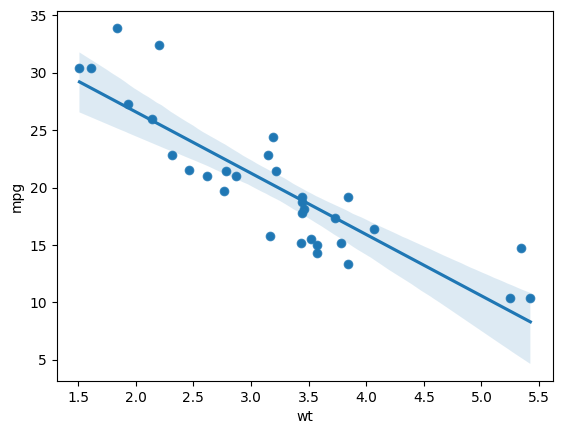

In [3]:
sns.scatterplot(x='wt', y='mpg', data=cars)
sns.regplot(x='wt', y='mpg', data=cars)

% convert data to tensor

In [4]:
X_list = cars.wt.values
X_np = np.array(X_list, dtype=np.float32).reshape(-1,1)
y_list = cars.mpg.values
y_np = np.array(y_list, dtype=np.float32).reshape(-1,1)
X = torch.from_numpy(X_np)
y_true = torch.from_numpy(y_np)

% Dataset and Dataloader

In [5]:
class LinearRegressionDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [6]:
train_loader = DataLoader(dataset = LinearRegressionDataset(X_np, y_np), batch_size=2)

% Model

In [7]:
class LinearRegressionTorch(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionTorch, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        return self.linear(x)

In [8]:
input_dim = 1
output_dim = 1
model = LinearRegressionTorch(input_size=input_dim, output_size=output_dim)
model.train()

LinearRegressionTorch(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

%% Mean Squared Error

In [9]:
loss_fun = nn.MSELoss()

% Optimizer

In [10]:
learning_rate = 0.02
# test different values of too large 0.1 and too small 0.001
# best 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

C:\Users\vivek\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


% perform training

In [11]:
losses = []
slope, bias = [], []
number_epochs = 1000
for epoch in range(number_epochs):
    for j, data in enumerate(train_loader):
        # optimization
        optimizer.zero_grad()

        # forward pass
        y_hat = model(data[0])

        # compute loss
        loss = loss_fun(y_hat, data[1])
        losses.append(loss.item())

        # backprop
        loss.backward()

        # update weights
        optimizer.step()
    
    # get parameters
    for name, param in model.named_parameters():
        if param.requires_grad:
            if name == 'linear.weight':
                slope.append(param.data.numpy()[0][0])
            if name == 'linear.bias':
                bias.append(param.data.numpy()[0])
    #  store loss
    losses.append(float(loss.data))
    # print loss
    if (epoch % 100 == 0):
        print(f"Epoch {epoch}, Loss: {loss.data}")

Epoch 0, Loss: 34.96317672729492
Epoch 100, Loss: 1.566398024559021
Epoch 200, Loss: 1.411515474319458
Epoch 300, Loss: 1.4094297885894775
Epoch 400, Loss: 1.409427285194397
Epoch 500, Loss: 1.409427285194397
Epoch 600, Loss: 1.409427285194397
Epoch 700, Loss: 1.409427285194397
Epoch 800, Loss: 1.409427285194397
Epoch 900, Loss: 1.409427285194397


%% model state dict

In [13]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[-5.7225]])),
             ('linear.bias', tensor([36.6935]))])

%% save model state dict

In [14]:
torch.save(model.state_dict(), "model_state_dict.pth")

%% load a model

In [15]:
model = LinearRegressionTorch(input_size=input_dim, output_size=output_dim)
model.load_state_dict(torch.load("model_state_dict.pth"))

<All keys matched successfully>

%%

In [16]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[-5.7225]])),
             ('linear.bias', tensor([36.6935]))])